In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df = pd.read_csv('/content/Realestate.csv')

# Display the first few rows
df.head(5)

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
# Define features (X) and target (y)
X = df[['transaction date', 'house age', 'distance to the nearest MRT station',
        'number of convenience stores', 'latitude', 'longitude']]
y = df['house price of unit area']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [9]:
# Predict house price for a specific input
specific_input = np.array([[2024.5, 10, 500, 5, 24.98, 121.54]])  # Example input values
specific_prediction = model.predict(specific_input)
print(f"Predicted House Price for the given input: {specific_prediction[0]:.2f}")

Predicted House Price for the given input: 107.89


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared Score: {r2:.2f}")

Mean Squared Error: 53.51
R-Squared Score: 0.68


In [11]:
# View model coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

                               Feature  Coefficient
0                     transaction date     5.440742
1                            house age    -0.270791
2  distance to the nearest MRT station    -0.004759
3         number of convenience stores     1.091425
4                             latitude   229.043054
5                            longitude   -29.492591


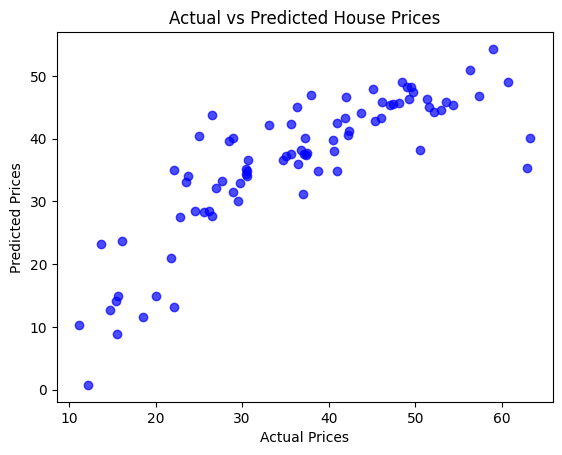

In [12]:
# Plot actual vs predicted prices
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()